In [2]:
## Common python packages
import numpy as np
import pandas as pd

## For plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")
sns.set_color_codes()
import hist, mplhep

## sklearn - ML tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve
from sklearn.utils import resample, shuffle

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

## weighted stats
from statsmodels.stats.weightstats import DescrStatsW

## uproot
import uproot3
import uproot

## "-" sign for graphs
rcParams['axes.unicode_minus'] = False

## Some extra styling
def namestr(obj, namespace = globals()):
    "Prints the name of a variable"
    return [name for name in namespace if namespace[name] is obj][0]

## For time
from time import time

In [36]:
## Univar Tools
def data_stats(df, cols = None):
    cols = df.columns if cols is None else cols
    return pd.DataFrame({"Mean": df[cols].mean, "Med": df[cols].median(), "STD": df[cols].std, 
                         "Min": df[cols].min(), "Max": df[cols].max()})
              
def hist_plotter(df, cols = None, range_x = None, n_std = 1, size = None, nbin = 100):
    cols = df.select_dtypes(include=np.number).columns if cols is None else cols
    for col in cols:
        range_ = [df[col].min() + n_std * df[col].std(), df[col].max() - n_std * df[col].std()] if range_x is None else range_x
        fig, ax = plt.subplots(1,1)
        df[col].plot(kind = "hist", range = range_, edgecolor = "blue", alpha = 1, bins = nbin, density = 1, ax = ax, figsize = size)
        plt.xlabel(col)
        plt.show()
    
def box_plotter(df, cols = None):
    cols = df.columns if cols is None else cols
    fig, ax = plt.subplots(1, 1)
    df[cols].boxplot(ax=ax)
    plt.xticks(rotation = 90)
    plt.show()

In [50]:
## Bivar Tools
def data_corr(df, size = None, cols = None):
    cols = df.columns if cols is None else cols 
    size = (len(cols), len(cols)) if size is None else size
    plt.figure(figsize = size)
    sns.heatmap(df.corr(), cmap = "coolwarm", square = True, vmin = -1, vmax = 1, annot=True)
    plt.show()

In [26]:
df_LPI = pd.read_csv("datasets_hi4/extra-dataset/LPIextend.csv")
df_LPI.unMember = df_LPI.unMember.replace({True: 1, False: 0})

In [27]:
df_LPI.head()

,Unnamed: 0,ID,Country,population (2023),area,landAreaKm,unMember,netChange,growthRate,worldPercentage,...,Infrastructure Score,Infrastructure Grouped Rank,International Shipments Score,International Shipments Grouped Rank,Logistics Competence and Quality Score,Logistics Competence and Quality Grouped Rank,Timeliness Score,Timeliness Grouped Rank,Tracking and Tracing Score,Tracking and Tracing Grouped Rank
0,0,0,Singapore,6014723.0,710.0,718.0,1.0,0.0012,0.0065,0.0008,...,4.6,1.0,4.0,2.0,4.4,1.0,4.3,1.0,4.4,1.0
1,1,1,Finland,5545475.0,338424.0,303940.0,1.0,0.0001,0.0009,0.0007,...,4.2,5.0,4.1,1.0,4.2,3.0,4.3,1.0,4.2,3.0
2,2,2,Denmark,5910913.0,43094.0,40000.0,1.0,0.0009,0.0049,0.0007,...,4.1,9.0,3.6,14.0,4.1,9.0,4.1,10.0,4.3,2.0
3,3,3,Germany,83294633.0,357114.0,349390.0,1.0,-0.0012,-0.0009,0.0104,...,4.3,3.0,3.7,8.0,4.2,3.0,4.1,10.0,4.2,3.0
4,4,4,Netherlands,17618299.0,41850.0,33670.0,1.0,0.0017,0.0031,0.0022,...,4.2,5.0,3.7,8.0,4.2,3.0,4.0,17.0,4.2,3.0


In [28]:
df_LPI.dtypes

Unnamed: 0                                         int64
ID                                                 int64
Country                                           object
population (2023)                                float64
area                                             float64
landAreaKm                                       float64
unMember                                         float64
netChange                                        float64
growthRate                                       float64
worldPercentage                                  float64
density                                          float64
densityMi                                        float64
rank                                             float64
LPI Grouped Rank                                 float64
Customs Score                                    float64
Customs Grouped Rank                             float64
Infrastructure Score                             float64
Infrastructure Grouped Rank    

In [29]:
df_LPI.isna().sum()

Unnamed: 0                                         0
ID                                                 0
Country                                            0
population (2023)                                 16
area                                              16
landAreaKm                                        16
unMember                                          16
netChange                                         24
growthRate                                        16
worldPercentage                                   22
density                                           16
densityMi                                         16
rank                                              16
LPI Grouped Rank                                 111
Customs Score                                    111
Customs Grouped Rank                             111
Infrastructure Score                             111
Infrastructure Grouped Rank                      111
International Shipments Score                 

In [30]:
df_LPI.shape

(250, 26)

In [31]:
data_stats(df_LPI.drop(columns = "Country"))

,Mean,Med,STD,Min,Max
Unnamed: 0,<bound method NDFrame._add_numeric_operations....,1.245000e+02,<bound method NDFrame._add_numeric_operations....,0.0000,2.490000e+02
ID,<bound method NDFrame._add_numeric_operations....,1.245000e+02,<bound method NDFrame._add_numeric_operations....,0.0000,2.490000e+02
population (2023),<bound method NDFrame._add_numeric_operations....,5.643895e+06,<bound method NDFrame._add_numeric_operations....,518.0000,1.428628e+09
area,<bound method NDFrame._add_numeric_operations....,8.119950e+04,<bound method NDFrame._add_numeric_operations....,0.4400,1.709824e+07
landAreaKm,<bound method NDFrame._add_numeric_operations....,7.568925e+04,<bound method NDFrame._add_numeric_operations....,0.4400,1.637687e+07
unMember,<bound method NDFrame._add_numeric_operations....,1.000000e+00,<bound method NDFrame._add_numeric_operations....,0.0000,1.000000e+00
netChange,<bound method NDFrame._add_numeric_operations....,9.000000e-04,<bound method NDFrame._add_numeric_operations....,-0.0286,4.184000e-01
growthRate,<bound method NDFrame._add_numeric_operations....,8.200000e-03,<bound method NDFrame._add_numeric_operations....,-0.0745,4.980000e-02
worldPercentage,<bound method NDFrame._add_numeric_operations....,7.500000e-04,<bound method NDFrame._add_numeric_operations....,0.0000,1.785000e-01
density,<bound method NDFrame._add_numeric_operations....,9.748100e+01,<bound method NDFrame._add_numeric_operations....,0.1380,2.140271e+04


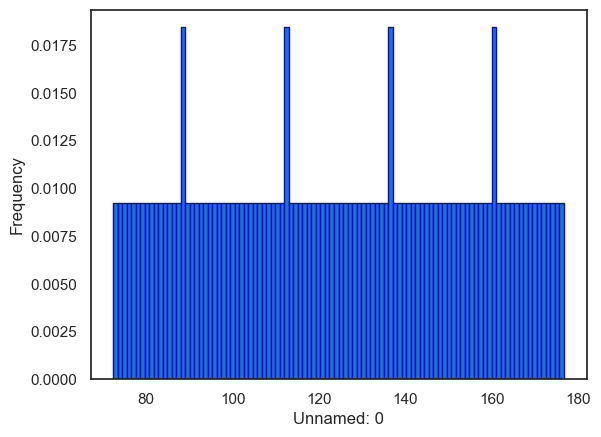

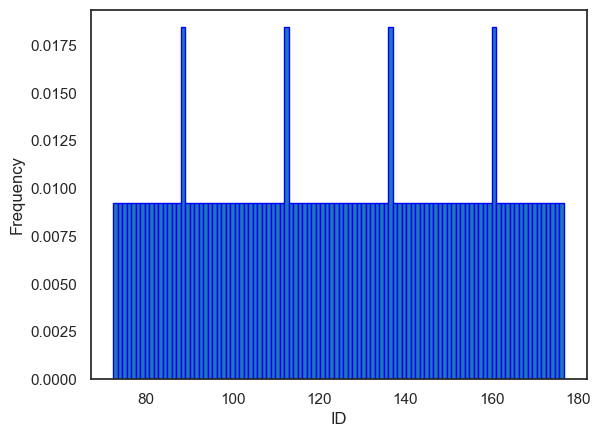

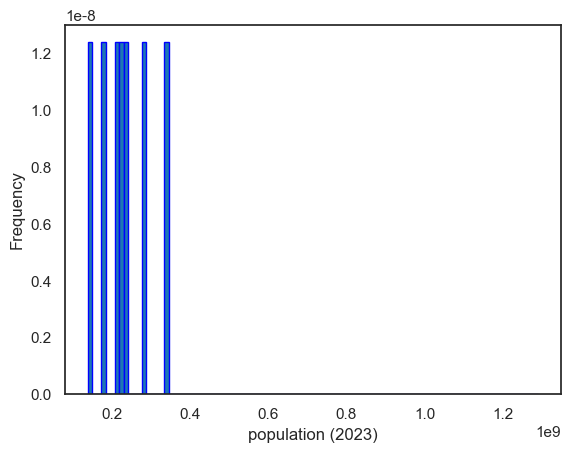

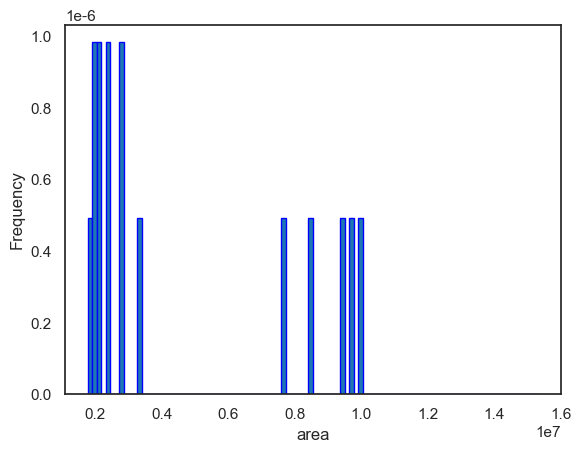

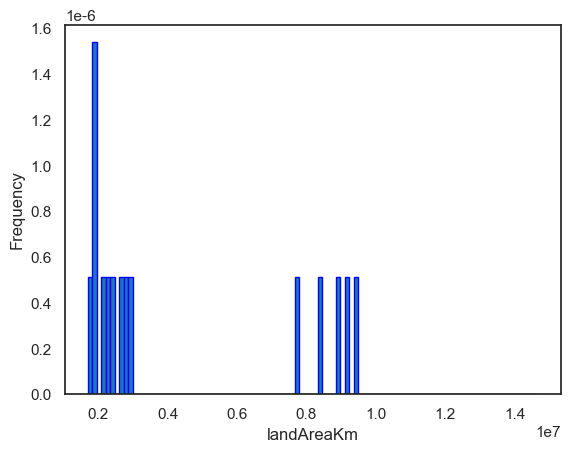

/home/alper/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


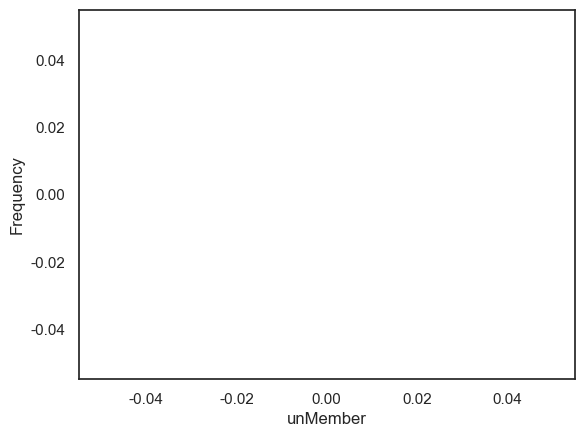

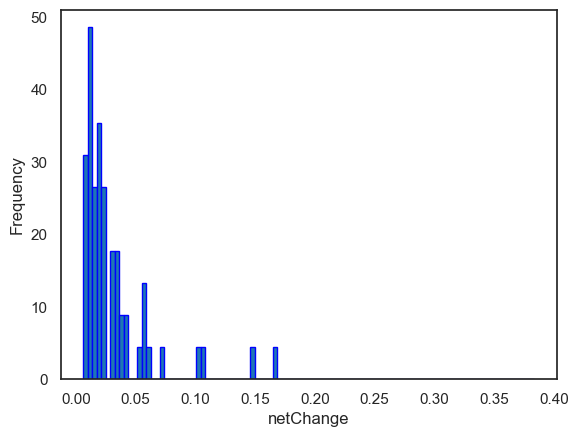

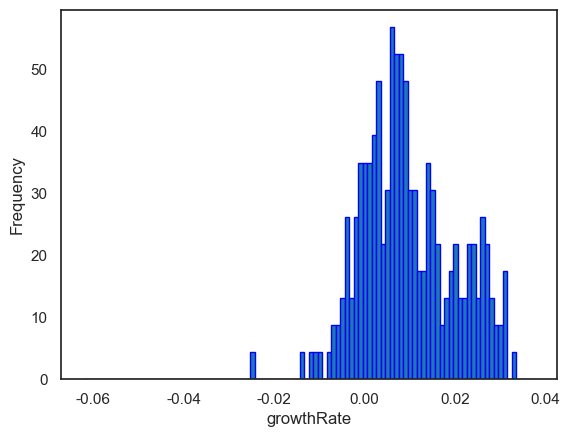

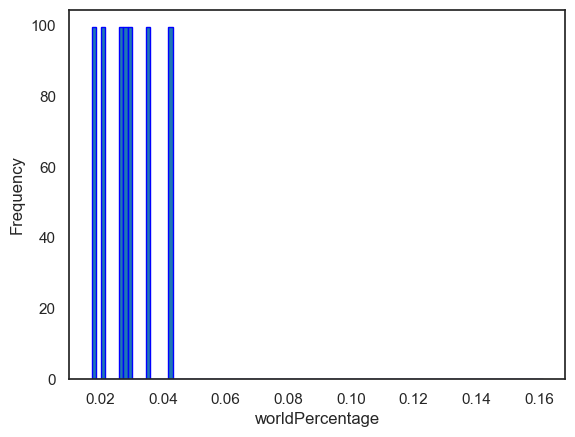

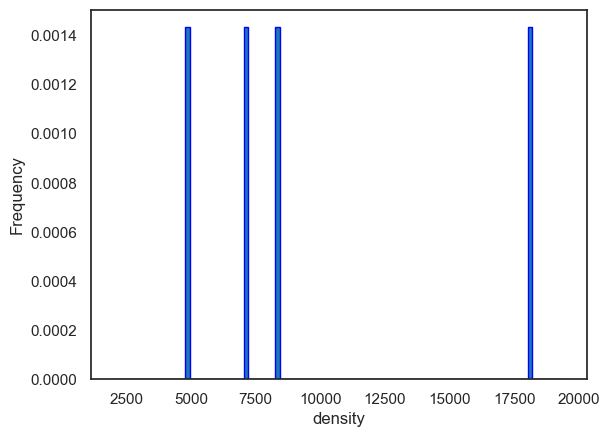

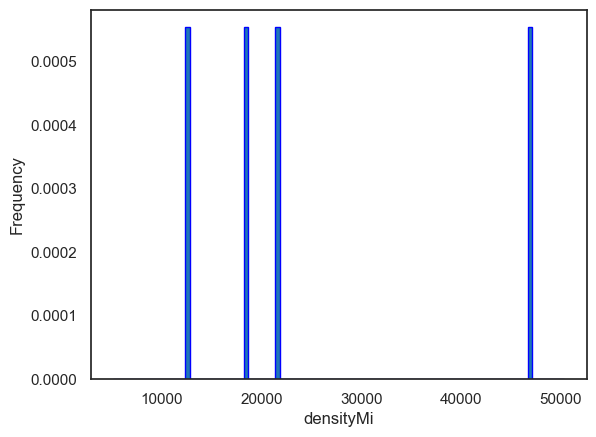

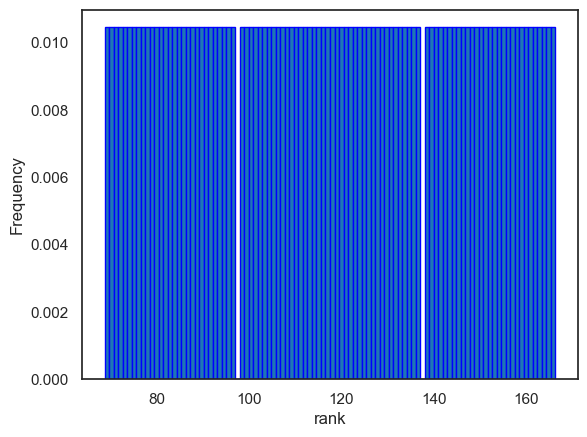

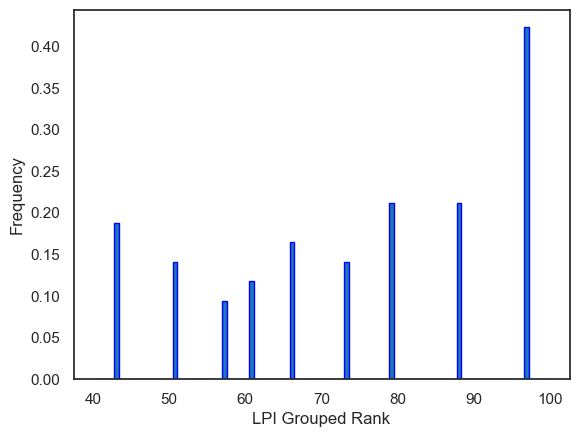

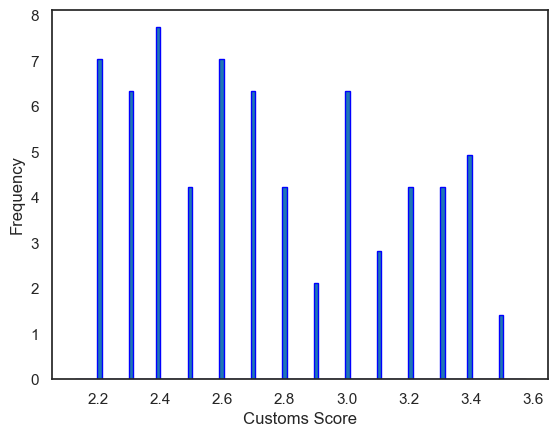

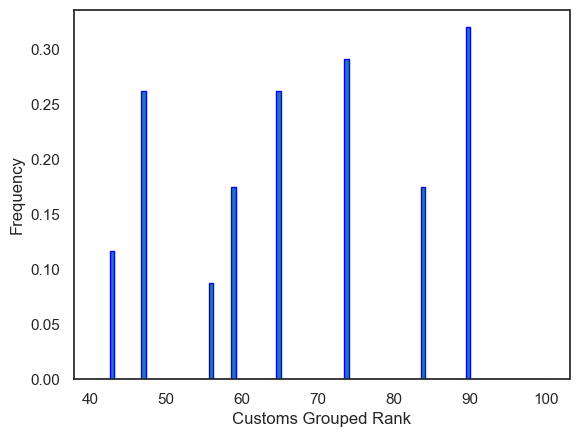

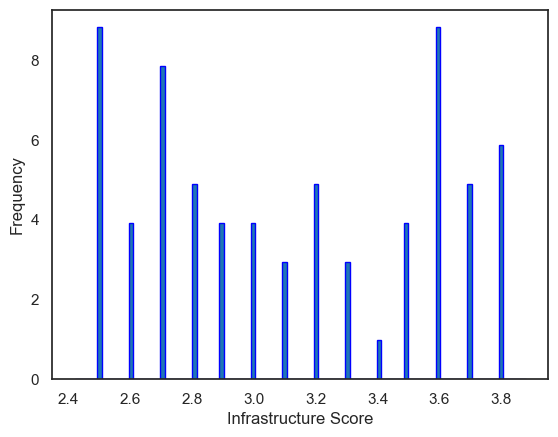

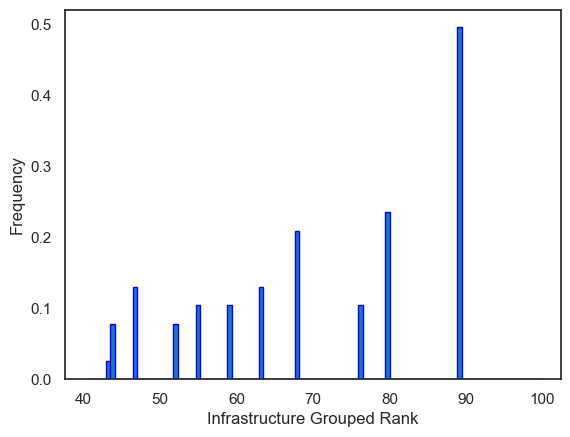

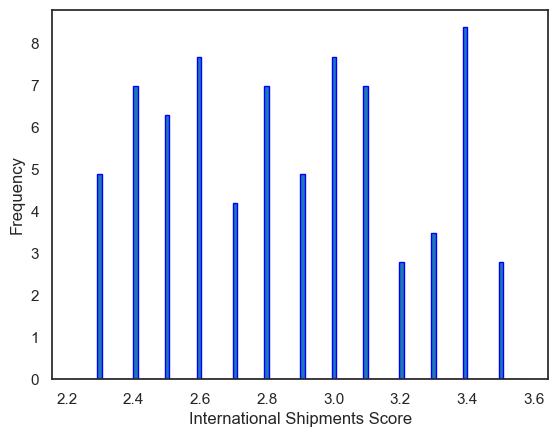

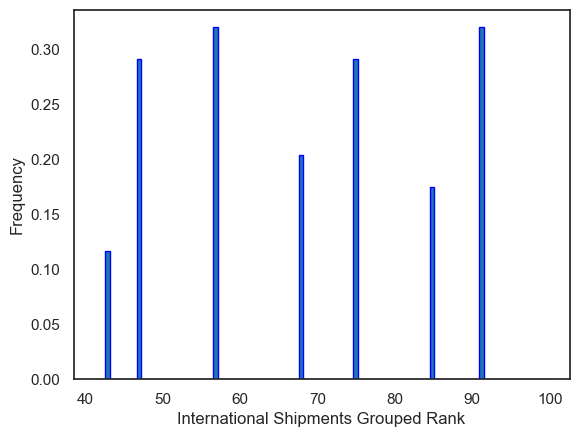

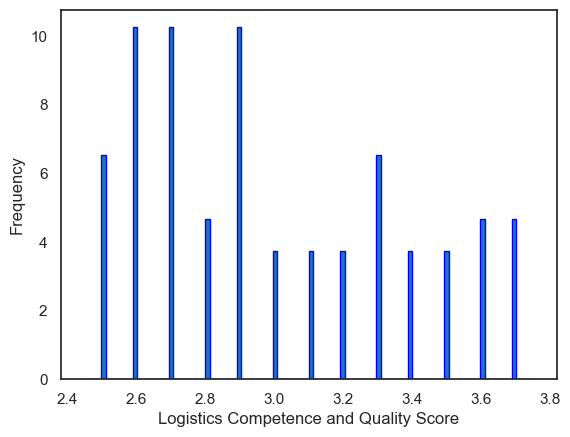

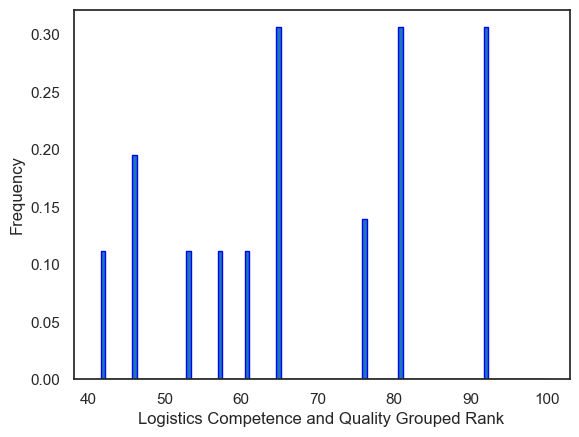

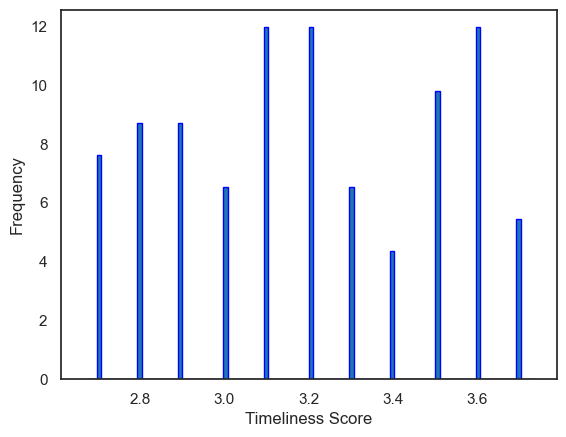

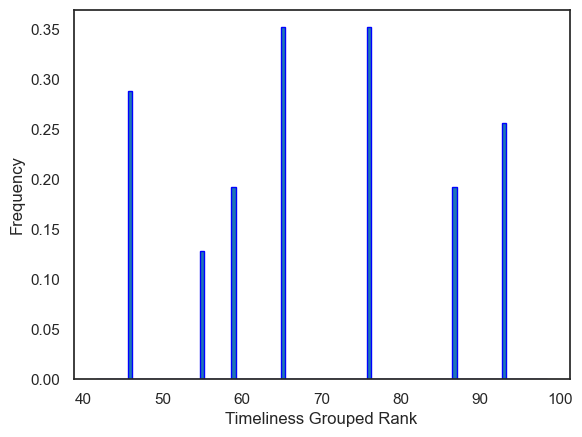

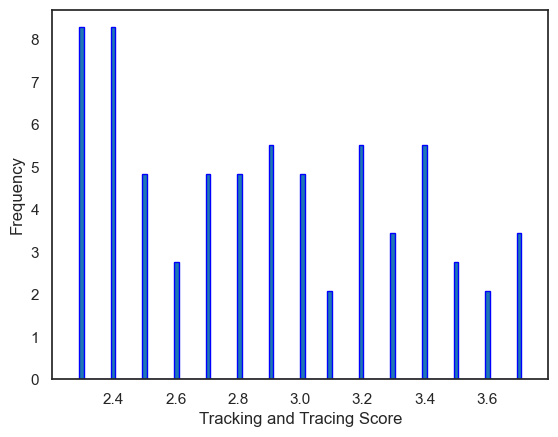

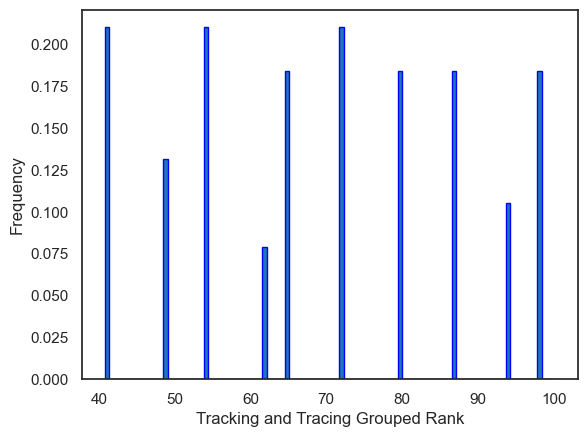

In [32]:
hist_plotter(df_LPI.select_dtypes(exclude="object"))

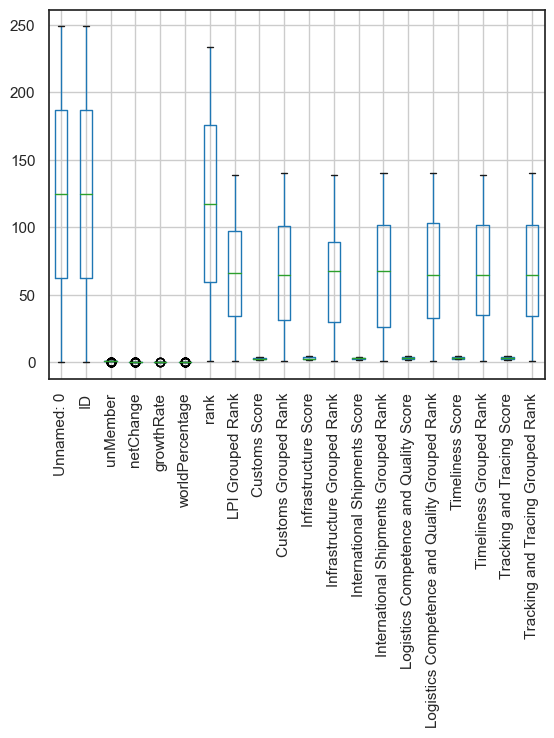

In [47]:
box_plotter(df_LPI, cols = df_LPI.drop(columns = ["population (2023)", "area", "landAreaKm", "density", "densityMi"]).columns)

/tmp/ipykernel_5745/2510070199.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "coolwarm", square = True, vmin = -1, vmax = 1, annot=True)


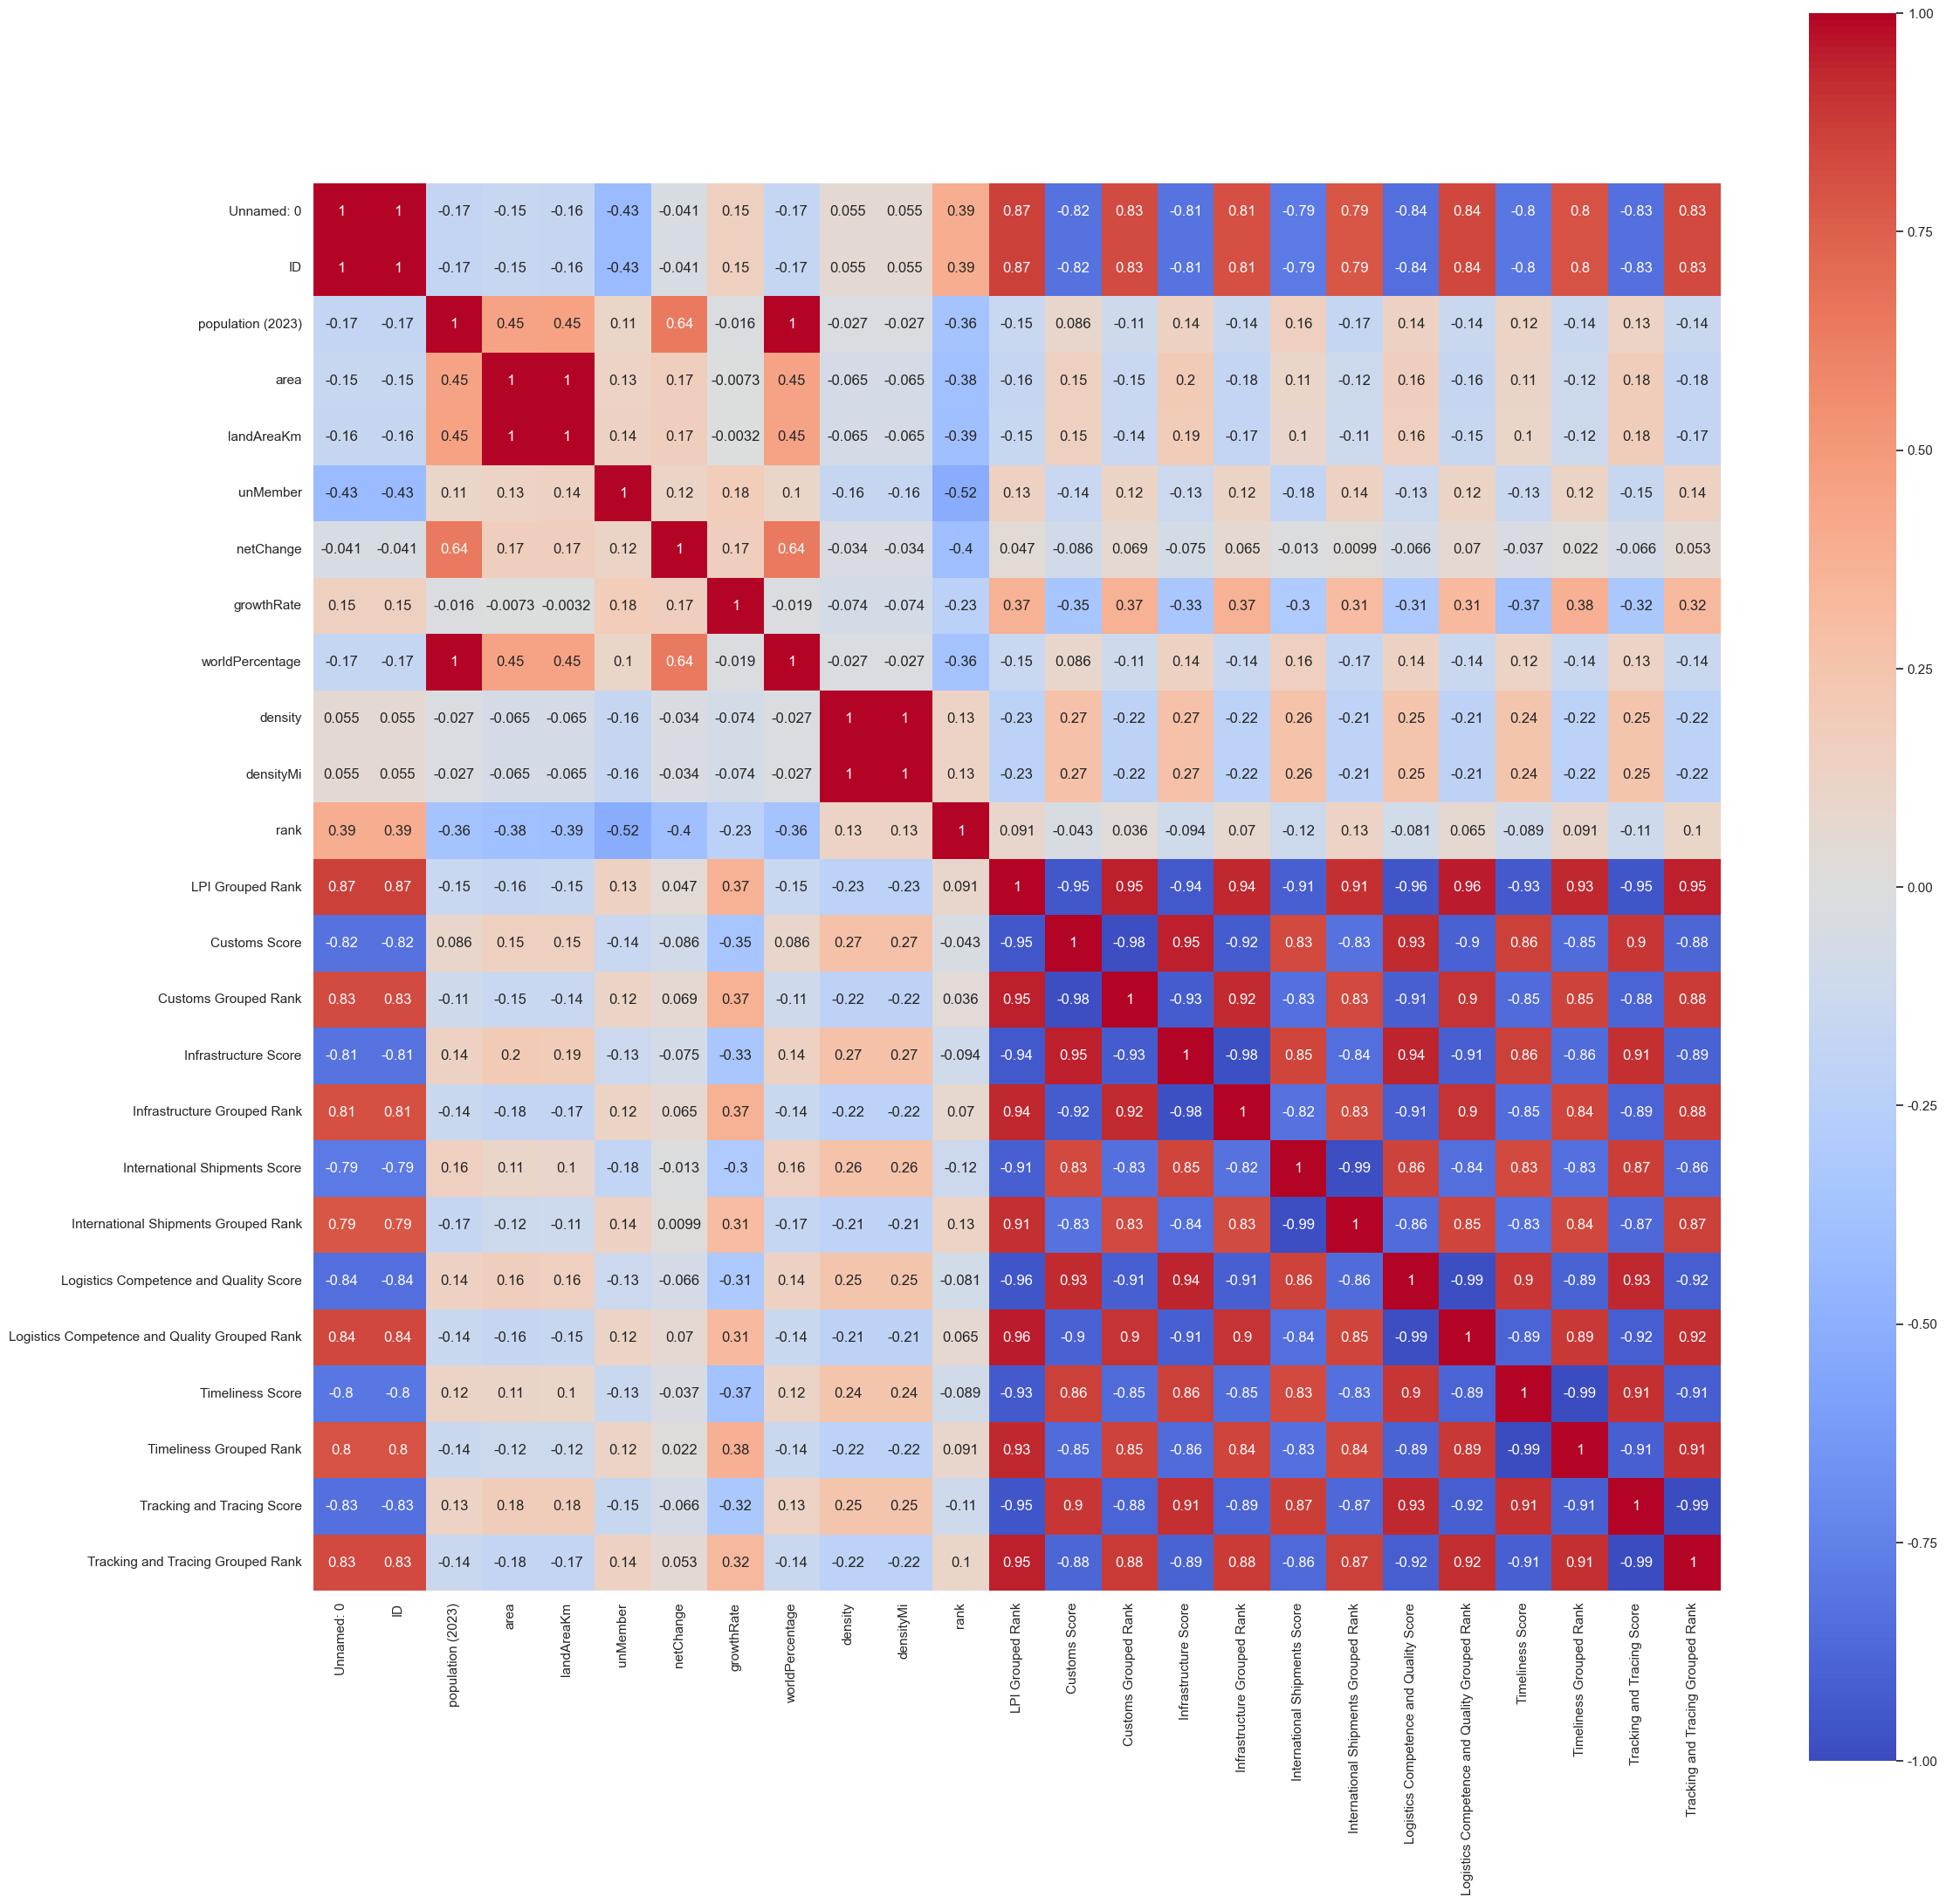

In [51]:
data_corr(df_LPI)